# Part 1 ‐ Exploratory data analysis

In [1]:
#import packages

import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#loading the data and converting it to the json format

with open('logins.json','r') as myfile:
    data=myfile.read()
data = json.loads(data)

In [3]:
#Making a pandas dataframe containing the time series, together with a column 'count' with the value 1

timestamps = []
for timestamp in data['login_time']:
    timestamps.append(datetime.strptime(timestamp,'%Y-%m-%d %H:%M:%S'))
    
df = pd.DataFrame({'time': timestamps})
df.set_index('time', inplace=True)
df['count'] = 1

df.head()

,count
time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [4]:
#Resampling the time series every 15 minutes, and aggregating by summing up
df_resampled = df.resample('15T').sum()
df_resampled.head()

,count
time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [5]:
#Printing the size of the resampled dataframe
df_resampled.shape

(9788, 1)

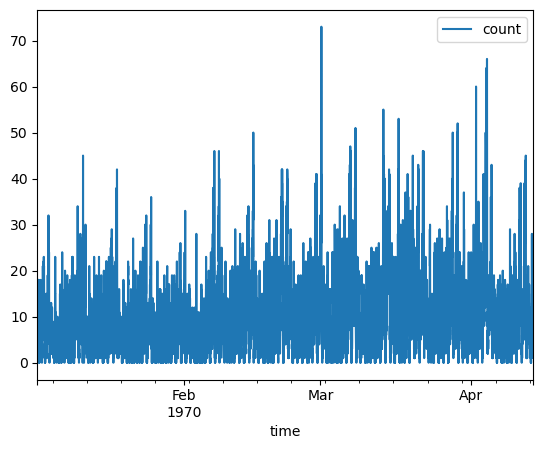

In [6]:
#Plotting the resampled time series
df_resampled.plot()
plt.show()

We see that the peaks in demand are taller in the warmer months of March and April compared to the colder months of January and February. This suggests that people use the service more often in the spring to go out than in the winter.

Next, let's break down the demand by time of the day, for a weekend day. We'll choose the date to be January 3, 1970, which was a Saturday.

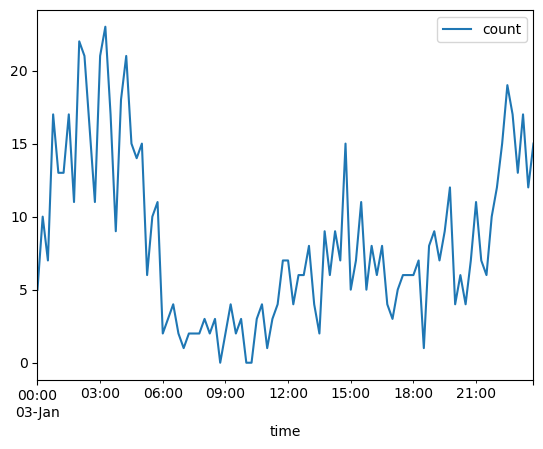

In [9]:
df_resampled_weekend = df_resampled.loc[df_resampled.index.strftime('%Y-%m-%d')=='1970-01-03']
df_resampled_weekend.plot()
plt.show()

We see from the above that there is a peak late at night, and a smaller peak in the afternoon. The tall peak at night is probably due to people going out to have a good time on Saturday night.

Now let's look at the same plot but for a weekday. We'll choose Feb 16, 1970, which was a Monday.

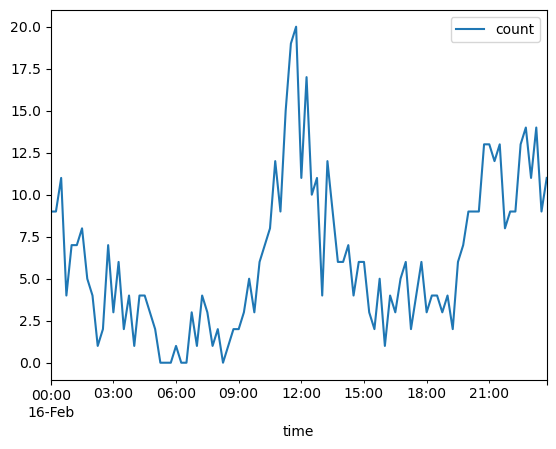

In [10]:
df_resampled_weekday = df_resampled.loc[df_resampled.index.strftime('%Y-%m-%d')=='1970-02-16']
df_resampled_weekday.plot()
plt.show()

The tallest peak is now around midday, instead of at night.

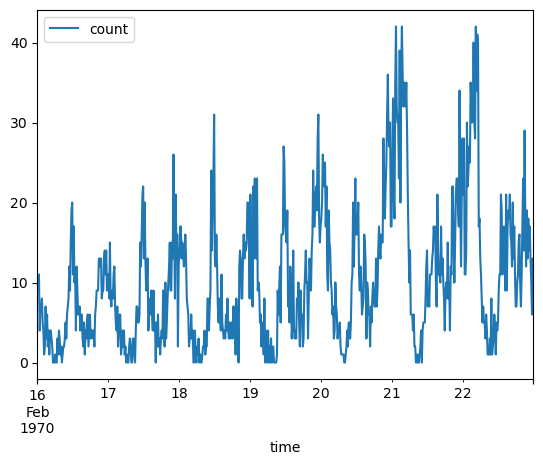

In [20]:
conditional = (df_resampled.index.strftime('%Y-%m-%d')=='1970-02-16') \
| (df_resampled.index.strftime('%Y-%m-%d')=='1970-02-17') \
| (df_resampled.index.strftime('%Y-%m-%d')=='1970-02-18') \
| (df_resampled.index.strftime('%Y-%m-%d')=='1970-02-19') \
| (df_resampled.index.strftime('%Y-%m-%d')=='1970-02-20') \
| (df_resampled.index.strftime('%Y-%m-%d')=='1970-02-21') \
| (df_resampled.index.strftime('%Y-%m-%d')=='1970-02-22')
df_resampled_week = df_resampled.loc[conditional]
df_resampled_week.plot()
plt.show()

We see that the peaks are taller at weekends compared to on weekdays.

# Part 2 ‐ Experiment and metrics design

# Part 3 ‐ Predictive modeling